<a href="https://colab.research.google.com/github/cwjng/si671-final-project/blob/main/ad_correlation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import scipy.stats as stats
from math import sqrt

In [23]:
df = pd.read_csv("si671-final-project/Ecommerce_Consumer_Behavior_Analysis_Data.csv")
df.head()

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$333.80,...,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,...,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,...,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,$101.31,...,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,...,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   object 
 10  Frequency_of_Purchase                  1000 non-null   int64  
 11  Purch

In [25]:
df["Purchase_Channel"].value_counts()

,count
Purchase_Channel,
Mixed,340
Online,334
In-Store,326


In [26]:
df[df["Engagement_with_Ads"].isnull()]["Social_Media_Influence"].value_counts()

,count
Social_Media_Influence,
High,67
Medium,61
Low,61


In [27]:
df['Purchase_Amount'] = df['Purchase_Amount'].replace({r'[$,]': ''}, regex=True).astype(float)
df['Social_Media_Influence'] = df['Social_Media_Influence'].fillna("None")
df['Engagement_with_Ads'] = df['Engagement_with_Ads'].fillna("None")

# Ordinal encoding
engagement_mapping = {'None': -1, 'Low': 0,'High': 2}
df['Engagement_with_Ads_Encoded'] = df['Engagement_with_Ads'].map(engagement_mapping)

social_media_mapping = {'None': -1, 'Low': 0, 'Medium': 1, 'High': 2}
df["Social_Media_Influence_Encoded"] = df["Social_Media_Influence"].map(social_media_mapping)

In [28]:
ad_features_numeric = [
    'Time_Spent_on_Product_Research(hours)',
    'Engagement_with_Ads_Encoded',
    'Social_Media_Influence_Encoded'
]

purchase_features_numeric = [
    'Purchase_Amount',
    'Frequency_of_Purchase',
    'Time_to_Decision'
]

ad_features_categorical = ['Engagement_with_Ads', 'Social_Media_Influence']
purchase_features_categorical = ['Purchase_Category', 'Purchase_Channel',
                                 'Payment_Method', 'Purchase_Intent']

# Pearson Correlation Analysis

In [29]:
pearson_df = df[ad_features_numeric + purchase_features_numeric].corr(method='pearson')

print("Pearson Correlation Matrix")
pearson_df



 Pearson Correlation Matrix


,Time_Spent_on_Product_Research(hours),Engagement_with_Ads_Encoded,Social_Media_Influence_Encoded,Purchase_Amount,Frequency_of_Purchase,Time_to_Decision
Time_Spent_on_Product_Research(hours),1.000000,0.019747,-0.054919,-0.019524,0.009575,-0.008795
Engagement_with_Ads_Encoded,0.019747,1.000000,-0.017740,0.020787,0.042620,0.021678
Social_Media_Influence_Encoded,-0.054919,-0.017740,1.000000,0.061699,-0.016617,-0.029626
Purchase_Amount,-0.019524,0.020787,0.061699,1.000000,0.000930,0.014690
Frequency_of_Purchase,0.009575,0.042620,-0.016617,0.000930,1.000000,0.034838
Time_to_Decision,-0.008795,0.021678,-0.029626,0.014690,0.034838,1.000000


## Heatmap

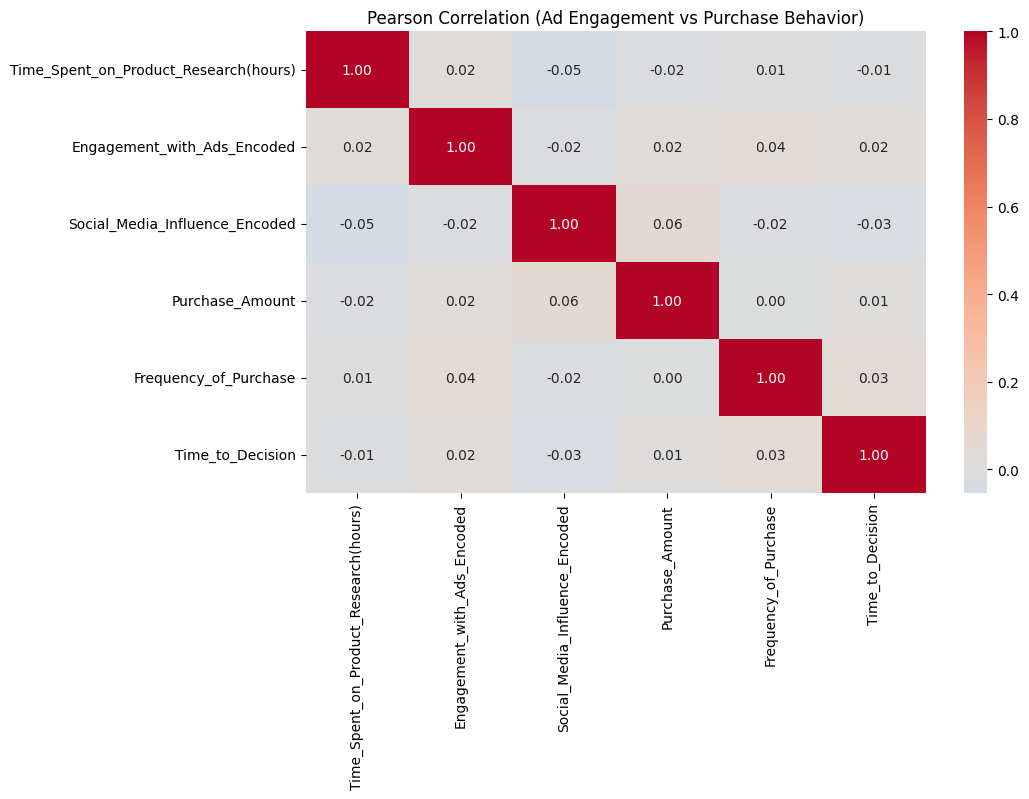

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_df, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Pearson Correlation (Ad Engagement vs Purchase Behavior)")
plt.show()

# Spearman Rank Correlation Analysis

Spearman's rank correlation assesses how well the relationship between two variables can be described using a monotonic function. It is a non-parametric measure, meaning it does not assume a specific distribution for the data.

In [31]:
spearman_df = df[ad_features_numeric + purchase_features_numeric].corr(method='spearman')

print("Spearman Correlation Matrix")
spearman_df


 Spearman Correlation Matrix


,Time_Spent_on_Product_Research(hours),Engagement_with_Ads_Encoded,Social_Media_Influence_Encoded,Purchase_Amount,Frequency_of_Purchase,Time_to_Decision
Time_Spent_on_Product_Research(hours),1.000000,0.012442,-0.055012,-0.021065,0.008452,-0.006143
Engagement_with_Ads_Encoded,0.012442,1.000000,-0.010371,0.015479,0.053169,0.021802
Social_Media_Influence_Encoded,-0.055012,-0.010371,1.000000,0.062563,-0.016121,-0.030013
Purchase_Amount,-0.021065,0.015479,0.062563,1.000000,0.001379,0.013842
Frequency_of_Purchase,0.008452,0.053169,-0.016121,0.001379,1.000000,0.034412
Time_to_Decision,-0.006143,0.021802,-0.030013,0.013842,0.034412,1.000000


## Heatmap

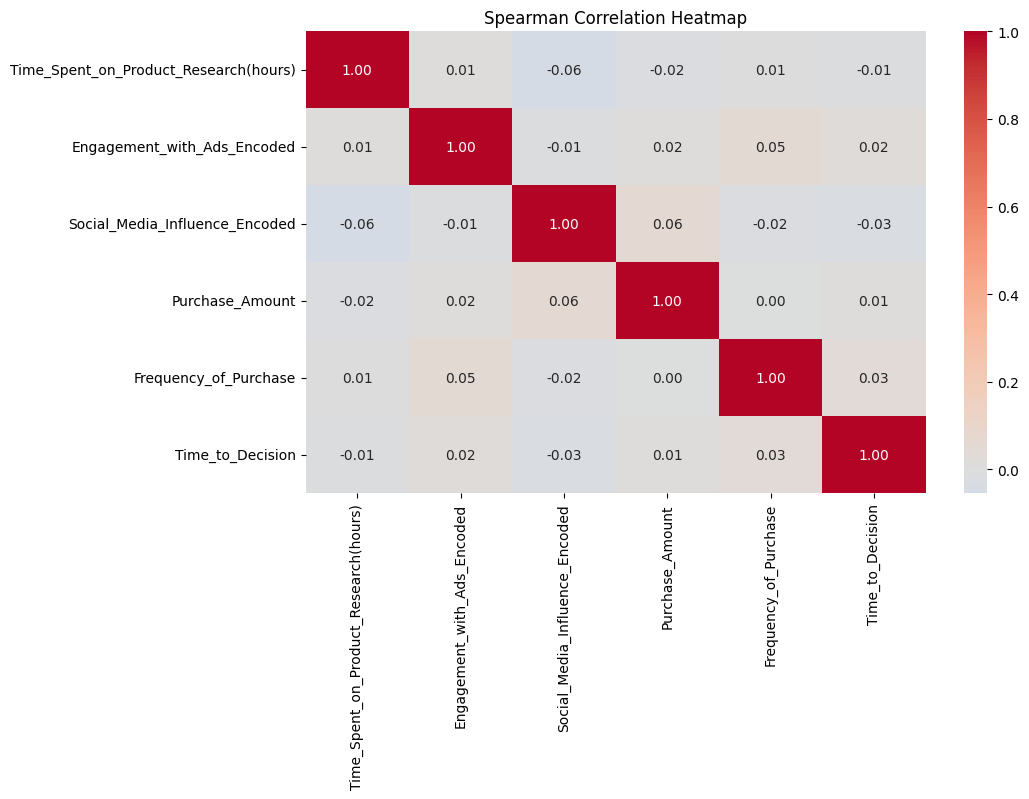

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(spearman_df, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()

# Cramer's V

In [37]:
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape

    # Bias correction for Cramer's V (recommended)
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)

    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

all_cat_vars = ad_features_categorical + purchase_features_categorical

# Build Cramer’s V matrix
cramers_matrix = pd.DataFrame(
    np.zeros((len(all_cat_vars), len(all_cat_vars))),
    index=all_cat_vars,
    columns=all_cat_vars
)

for col1 in all_cat_vars:
    for col2 in all_cat_vars:
        cramers_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

print("Cramer's V Matrix")
display(cramers_matrix)

Cramer's V Matrix


,Engagement_with_Ads,Social_Media_Influence,Purchase_Category,Purchase_Channel,Payment_Method,Purchase_Intent
Engagement_with_Ads,1.000000,0.000000,0.000000,0.000000,0.000000,0.042289
Social_Media_Influence,0.000000,1.000000,0.000000,0.000000,0.036335,0.012785
Purchase_Category,0.000000,0.000000,1.000000,0.042542,0.000000,0.043690
Purchase_Channel,0.000000,0.000000,0.042542,1.000000,0.039058,0.019690
Payment_Method,0.000000,0.036335,0.000000,0.039058,1.000000,0.046059
Purchase_Intent,0.042289,0.012785,0.043690,0.019690,0.046059,1.000000


## Heatmap

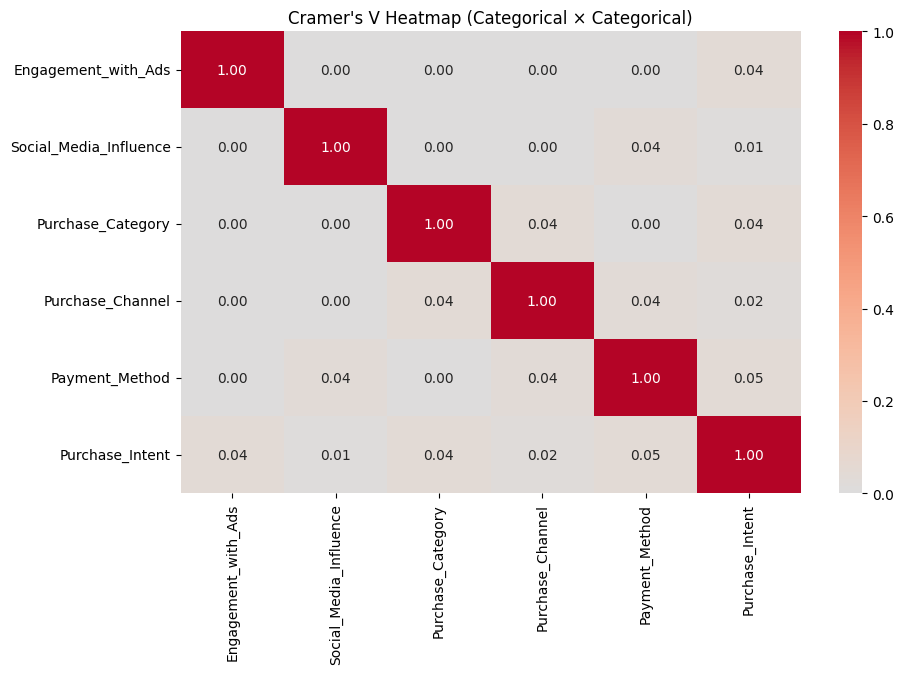

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(cramers_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Cramer's V Heatmap (Categorical × Categorical)")
plt.show()